In [1]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv


In [2]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(9659, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6482 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6482 non-null   int64  
 1   App             6482 non-null   object 
 2   Category        6482 non-null   object 
 3   Rating          6482 non-null   float64
 4   Reviews         6482 non-null   int64  
 5   Size            6482 non-null   float64
 6   Installs        6482 non-null   int64  
 7   Type            6482 non-null   object 
 8   Price           6482 non-null   float64
 9   Content Rating  6482 non-null   object 
 10  Genres          6482 non-null   object 
 11  Last Updated    6482 non-null   object 
 12  Current Ver     6482 non-null   object 
 13  Android Ver     6482 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 759.6+ KB


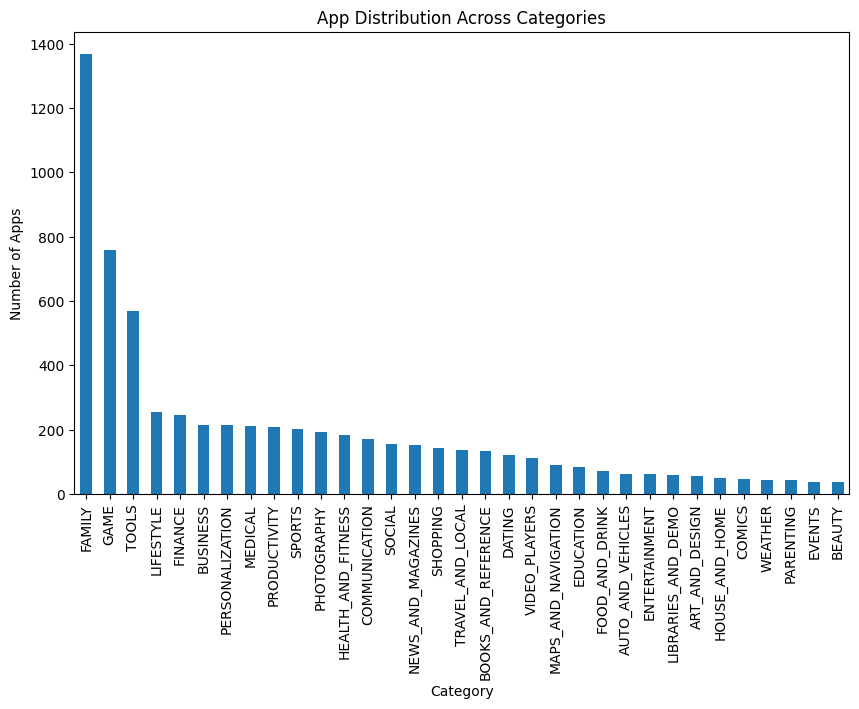

In [8]:
import matplotlib.pyplot as plt

category_count = df['Category'].value_counts()

plt.figure(figsize=(10,6))
category_count.plot(kind='bar')
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

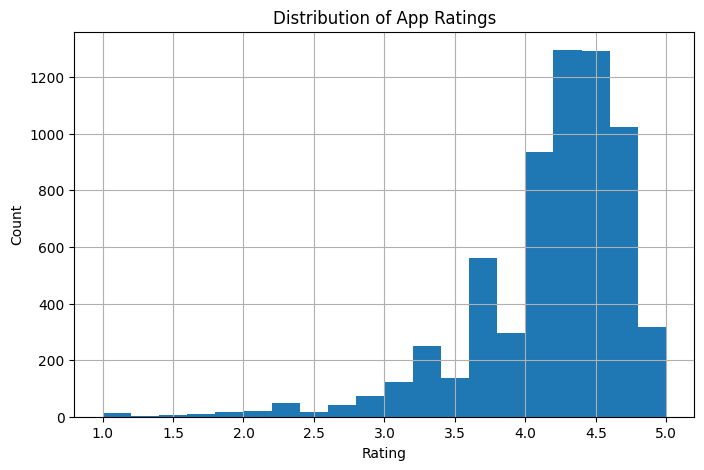

In [9]:
plt.figure(figsize=(8,5))
df['Rating'].hist(bins=20)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

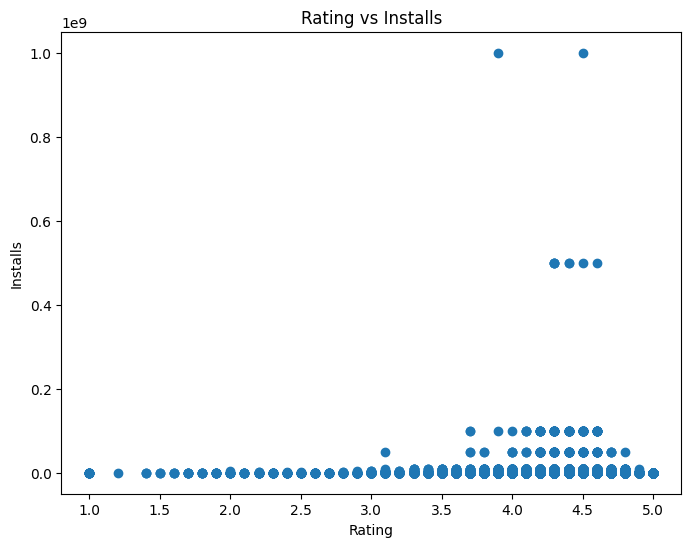

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Installs'])
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating vs Installs")
plt.show()

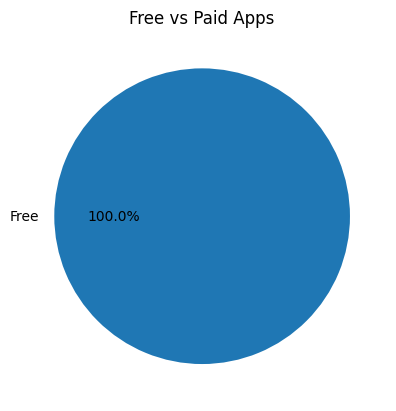

In [11]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()

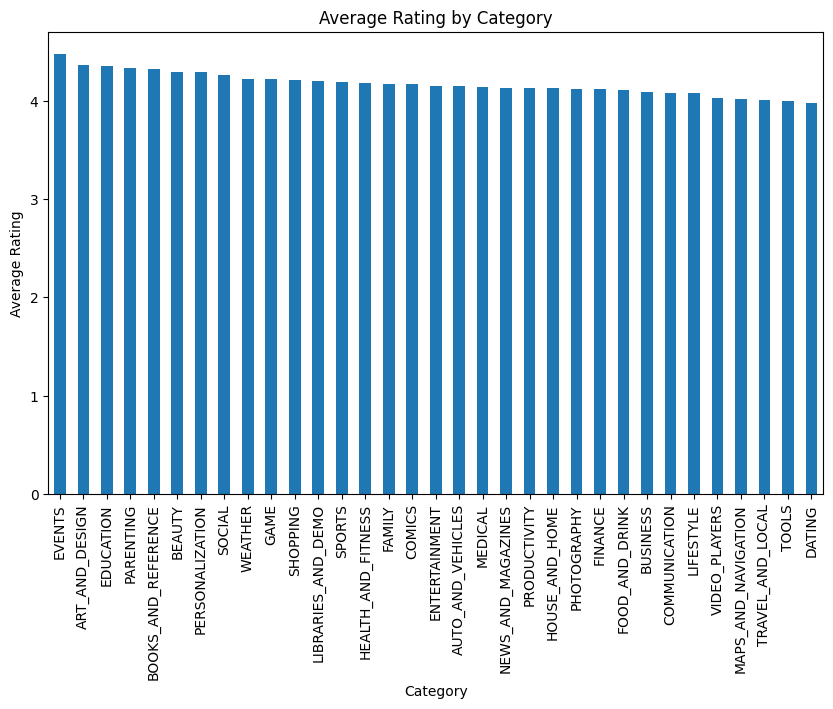

In [12]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating.plot(kind='bar')
plt.title("Average Rating by Category")
plt.ylabel("Average Rating")
plt.show()

In [13]:
print("Top 5 Most Installed Apps:")
df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head()

Top 5 Most Installed Apps:


,App,Installs
1356,Subway Surfers,1000000000
2977,Google News,1000000000
342,UC Browser - Fast Download Private & Secure,500000000
1357,Candy Crush Saga,500000000
1364,Pou,500000000
